In this exercise we will build a model to recognize hand written digits from 0 to 9, using logistic regression and neural networks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat


In [3]:
#using scipy.io module, imported .mat file containing training data
data= loadmat('E:\Ashu LIBRARY\IISER COURSE\online course\machine-learning-ex\ex3\ex3data1.mat')
# data is a dict with key "X" for x-values, and key "y" for y values
X= data['X']
y=data['y']
m= len(y)

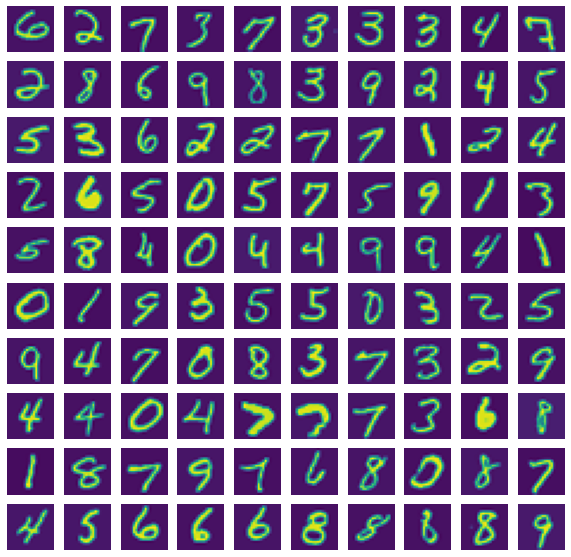

In [4]:
#Visualizing subset of the trainig set using matplotlib.image
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F")) #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

In [10]:
#computing cost function
def sigmoid(z):
    return 1/(1+np.exp(-z))
def costfunct(x,y,theta, Lambda):
    m= len(y)
    h_x= sigmoid(x@theta)
    error= (-y*np.log(h_x))-((1-y)*np.log(1-h_x))
    cost= 1/m * sum(error)
    j= cost+ Lambda/(2*m)*sum(theta[1:]**2)
    j_0= 1/m * (x.T @ (h_x-y))[0]
    j_1= 1/m * (x.T @ (h_x-y))[1:]+ (Lambda/m)*theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return j, grad

In [11]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = costfunct(X_t, y_t,theta_t, 3)
print("Cost: ", J)
print("grad: ", grad)

Cost:  [2.5348194]
grad:  [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


Implementing One Vs All classification

In [12]:
def gradientdescent(x,y,theta,iterations,alpha,Lambda):   #defining gradient descent
    j_h=[]
    for i in range(iterations):
        cost,grad= costfunct(x,y,theta,Lambda)
        theta= theta- (alpha*grad)
        j_h.append(cost)
    return theta, j_h
        

In [13]:
def onevsall(x,y,num_labels,Lambda):
    m,n = x.shape[0],x.shape[1]
    initial_theta= np.zeros((n+1,1))
    all_theta= []
    all_j=[]
    x= np.hstack((np.ones((m,1)),x))
    for i in range(1,num_labels+1):
        theta,j_h= gradientdescent(x,np.where(y==i,1,0),initial_theta,300,1,Lambda)
        all_theta.extend(theta)
        all_j.extend(j_h)
    return np.array(all_theta).reshape(num_labels,n+1),all_j

In [14]:
all_theta, all_j= onevsall(X,y,10,0.1)
all_theta

array([[-3.41466417e-01,  0.00000000e+00,  0.00000000e+00, ...,
         7.53488100e-05,  2.12516707e-07,  0.00000000e+00],
       [-1.45647255e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.93427964e-04, -6.79593321e-05,  0.00000000e+00],
       [-1.91272503e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.75484540e-06,  1.67249019e-07,  0.00000000e+00],
       ...,
       [-3.50549935e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.87264345e-05,  3.62108928e-06,  0.00000000e+00],
       [-1.98735774e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.97834318e-05,  2.94017020e-06,  0.00000000e+00],
       [-1.42176307e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.51819230e-04,  4.00186462e-06,  0.00000000e+00]])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

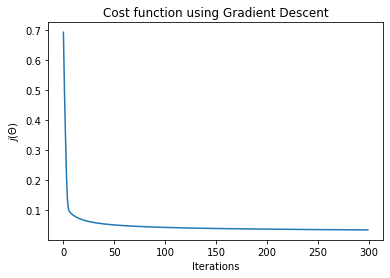

In [15]:
plt.plot(all_j[0:300])
plt.xlabel('Iterations')
plt.ylabel('$j(\Theta)$')
plt.title('Cost function using Gradient Descent')

One-Vs-All Prediction

In [16]:
def predictonevsall(all_theta,x):
    m= x.shape[0]
   
    x= np.hstack((np.ones((m,1)),x))
    prediction= x@all_theta.T
    return np.argmax(prediction,axis=1)+1

In [17]:
pred= predictonevsall(all_theta,X)
print("Training set Accuracy: ", sum(pred[:,np.newaxis]==y)[0]/5000 * 100,"%")

Training set Accuracy:  91.46 %


Implementing Neural network to recognize handwritten digits using the same trainig set as used above.
Theta1 and Theta2 are all rerady trained for this exercise

In [19]:
#loading data
mat2= loadmat('E:\Ashu LIBRARY\IISER COURSE\online course\machine-learning-ex\ex3\ex3weights.mat')
theta1= mat2['Theta1'] #theta1 has size 25*401
theta2= mat2['Theta2']#theta2 has size 10*26

In [22]:
#Feedforward propagation
def predict(theta1,theta2,x):
    m= x.shape[0]
    num_label= theta2.shape[0]
    a1= np.hstack((np.ones((m,1)),x))
    z2= a1@theta1.T
    a2= sigmoid(z2)
    a2= np.hstack((np.ones((a2.shape[0],1)),a2))
    z3= a2@theta2.T
    a3= sigmoid(z3)
    return np.argmax(a3,axis=1)+1

In [23]:
pred2= predict(theta1,theta2,X)
print('Trainig set accuracy: ', sum(pred2[:,np.newaxis]==y)[0]/5000*100,'%')

Trainig set accuracy:  97.52 %


Clearly accuracy of neural network is much greater then logistic regression